In [ ]:
import nibabel as nb
import numpy as np
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import SUITPy as suit 
import nitools as nt 
import Functional_Fusion.plot as plot
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sb
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion' 
atlas_dir = base_dir + '/Atlases/tpl-MNI152NLin2009cSymC'
wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/dentate_atlas'


In [3]:
pmap = np.load(f"{wk_dir}/Prob_dentate.npy")


In [17]:
# Load the color map and labels
lid,cmap,roi_names = nt.read_lut('/Volumes/diedrichsen_data$/data/FunctionalFusion/Atlases/tpl-MNI152NLin2009cSymC/atl-NettekovenSym32.lut')


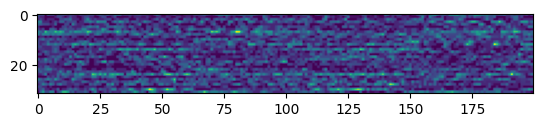

In [10]:
# Let's check the probability assignments: 
plt.imshow(pmap[:,:200])

<Axes: xlabel='prob', ylabel='region'>

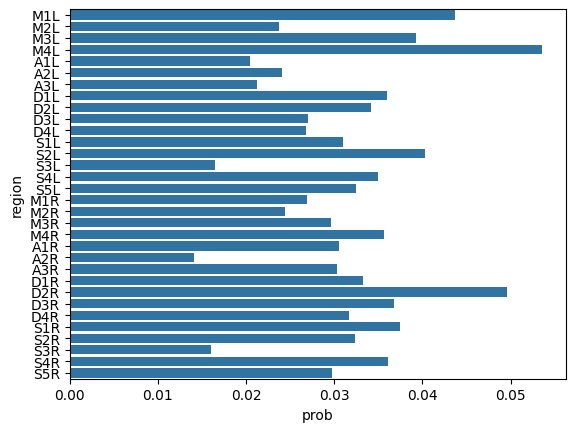

In [ ]:
p = pmap.mean(axis=1)
D=pd.DataFrame({'region':roi_names[1:],'prob':p})
sb.barplot(y='region',x='prob',data=D)


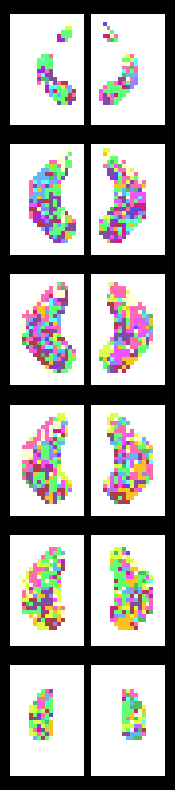

In [16]:
#wta = np.argmax(data,axis=0)
wta = np.argmax(pmap, axis=0) 
wta += 1

wta_int32 = wta.astype(np.int32)

dentate_parcellation = plot.plot_dentate(wta_int32,cscale=[0,32],cmap=cmap)

pass 

In [28]:
new_labels = ['0','M','A','D','S'] # Use regexpress '..L','..R' for leftvs.right
index = ds.combine_parcel_labels(roi_names,new_labels)
index = index[1:]
new_reg = np.unique(index)
newprob = np.zeros((len(new_reg),pmap.shape[1]))
for i in range(len(new_reg)):
    newprob[i,:] = pmap[index==new_reg[i],:].sum(axis=0)
 

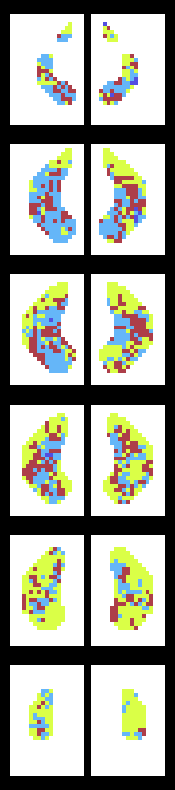

In [35]:
new_cmap = cmap[[0,3,6,8,13],:]

wta = np.argmax(newprob, axis=0) 
wta += 1

wta_int32 = wta.astype(np.int32)

dentate_parcellation = plot.plot_dentate(wta_int32,cscale=[0,4],cmap=new_cmap)


(array([1131.,    0.,    0.,   23.,    0.,    0.,  909.,    0.,    0.,
        1871.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

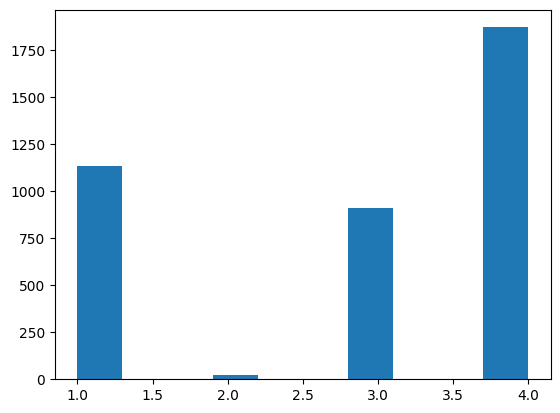

In [41]:
plt.hist(wta.flatten())